<a href="https://colab.research.google.com/github/chandugalli/data-visuvalization/blob/main/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!git clone https://github.com/chandugalli/data-visuvalization.git

fatal: destination path 'data-visuvalization' already exists and is not an empty directory.


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("Amazon Big Billion Sale 2025 -Oct Mobile Phones.csv")

df.head()

,Product_Name,Price,Rating,Review_Count,ASIN,Product_URL
0,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",6249.0,4.0,7230,B0DFY3XCB6,https://www.amazon.in/Samsung-Storage-Display-...
1,"Samsung Galaxy M06 5G (Sage Green, 6GB RAM, 12...",8999.0,3.9,3321,B0DX655V11,https://www.amazon.in/Samsung-MediaTek-Dimensi...
2,realme C73 5G Smartphone 6.67 Inch Screen 120H...,10544.0,NaN,0,B0FLV2S332,https://www.amazon.in/realme-Smartphone-6000mA...
3,"Redmi 13 5G Prime Edition, Orchid Pink, 8GB+12...",10999.0,4.1,2379,B0D78X5CMJ,https://www.amazon.in/Redmi-Orchid-Largest-Dis...
4,"Redmi A4 5G (Starry Black, 6GB RAM, 128GB Stor...",8999.0,3.9,7208,B0FBRM15FH,https://www.amazon.in/Redmi-A4-5G-Storage-Char...


In [44]:

df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  3529 non-null   object 
 1   Price         3510 non-null   float64
 2   Rating        3452 non-null   float64
 3   Review_Count  3529 non-null   int64  
 4   ASIN          3529 non-null   object 
 5   Product_URL   3529 non-null   object 
 6   Brand         3529 non-null   object 
 7   Value_Score   3433 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 220.7+ KB


,0
Product_Name,0
Price,19
Rating,77
Review_Count,0
ASIN,0
Product_URL,0
Brand,0
Value_Score,96


In [15]:
df.columns


Index(['Product_Name', 'Price', 'Rating', 'Review_Count', 'ASIN',
       'Product_URL'],
      dtype='object')

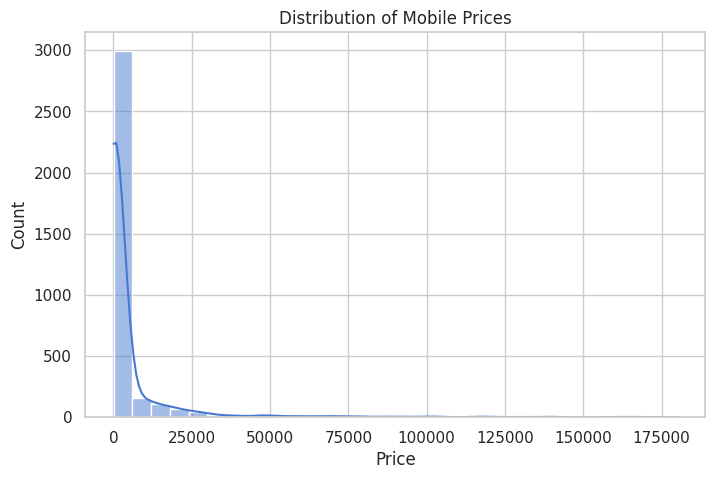

In [16]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Mobile Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



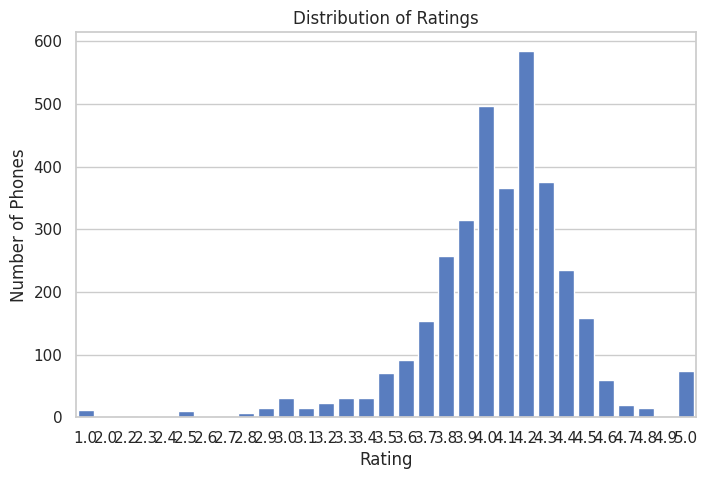

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Phones")
plt.show()


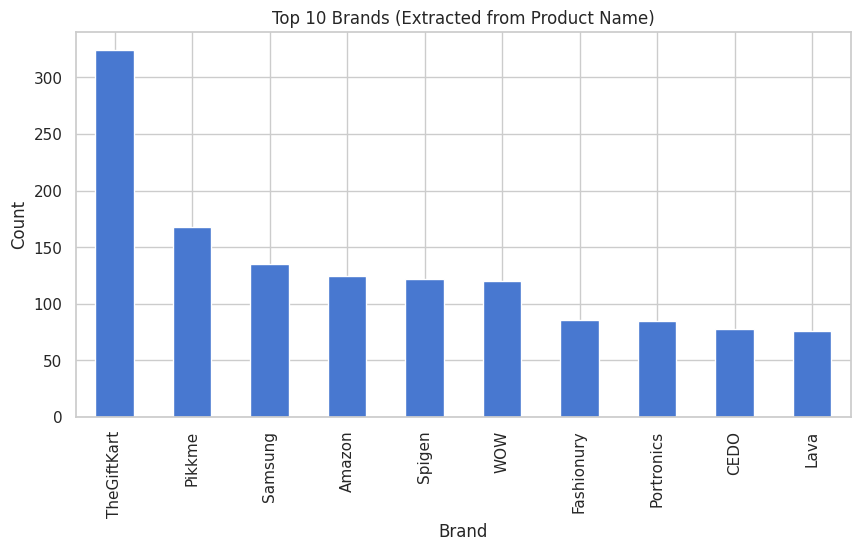

In [18]:
df['Brand'] = df['Product_Name'].str.split().str[0]

plt.figure(figsize=(10,5))
df['Brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Brands (Extracted from Product Name)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


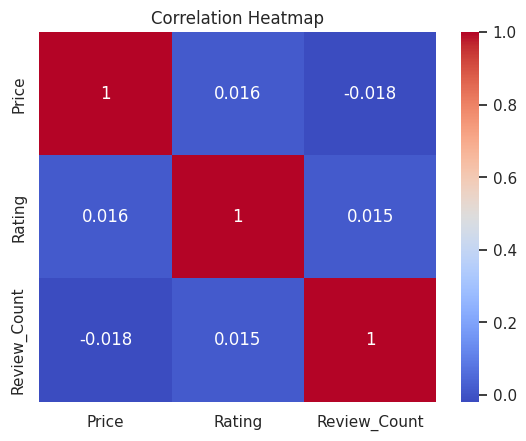

In [19]:
corr = df[['Price','Rating','Review_Count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
df['Value_Score'] = (df['Rating'] * np.log1p(df['Review_Count'])) / df['Price']
best_value = df.sort_values(by='Value_Score', ascending=False).head(10)
best_value[['Product_Name', 'Brand', 'Price', 'Rating', 'Review_Count', 'Value_Score']]


,Product_Name,Brand,Price,Rating,Review_Count,Value_Score
3475,"Inefable® Pubg Anti-Slip Thumb Sleeve, Increas...",Inefable®,50.0,3.6,4279,0.602043
3456,"Inefable® Pubg Anti-Slip Thumb Sleeve, Increas...",Inefable®,50.0,3.6,4279,0.602043
1993,STRIFF Multi Angle Tablet Tabletop Stand. Hold...,STRIFF,89.0,4.1,15309,0.443918
533,GRAND PITSTOP Silicone Grip Bands for Mobile H...,GRAND,85.0,4.0,5454,0.404908
1219,ELV Desktop Cell Phone Stand Tablet Tabletop S...,ELV,119.0,4.3,36765,0.379857
1842,"AGARO Blaze USB 3.0 to Type C OTG Adapter, Com...",AGARO,119.0,4.2,31654,0.365741
596,Portronics MODESK Universal Mobile Holder Stan...,Portronics,119.0,4.2,28183,0.361642
3114,Ambrane Unbreakable 60W Fast Charging 1.5M Bra...,Ambrane,129.0,4.0,80673,0.350331
603,ELV Mobile Phone Tabletop Holder for Phones an...,ELV,119.0,4.3,13907,0.344731
1111,Portronics Modesk 101 Wall Mount Mobile Holder...,Portronics,111.0,4.3,6390,0.339454


In [24]:
# Remove rows with missing brand or rating values
df_clean = df.dropna(subset=['Brand', 'Rating'])

top_rated = df_clean.loc[df_clean.groupby('Brand')['Rating'].idxmax()][['Brand', 'Product_Name', 'Rating', 'Price']]
top_rated.sort_values(by='Rating', ascending=False).head(10)


,Brand,Product_Name,Rating,Price
2510,5Pcs,"5Pcs Phone Charms, Cute Cat Bag Charms for Han...",5.0,289.0
1389,swabs®,swabs® Belt Holder for Men Cell Phone Holster ...,5.0,281.0
2914,Prolet,Prolet Mobile Phone Wrist Lanyard with Diamond...,5.0,229.0
1422,Ant,Ant Mount Clip Mobile Holder 360° Rotating Adj...,5.0,289.0
1771,Pivdo,Pivdo Lanyard Phone Strap - Pearl and Diamond ...,5.0,699.0
1786,Portronics,"Portronics Car Power Quard 111W Car Charger, 4...",5.0,489.0
623,NEWDRU,NEWDRU LED Video Light for Laptop & Camera | R...,5.0,1220.0
461,Samsung,"Samsung Galaxy M07 (Black, 4GB RAM, 64GB Stora...",5.0,6999.0
1696,Outlouders,Outlouders Back Cover for iQOO Z10R 5G | Full ...,5.0,199.0
2778,CEDO,CEDO OnePlus Nord CE5 / CE 5 (5G) Back Case Co...,5.0,149.0


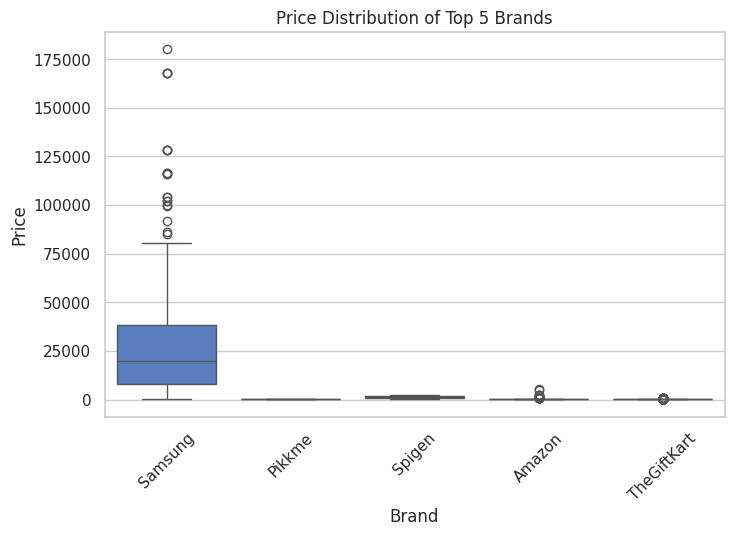

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(df['Brand'].value_counts().head(5).index)])
plt.title("Price Distribution of Top 5 Brands")
plt.xticks(rotation=45)
plt.show()


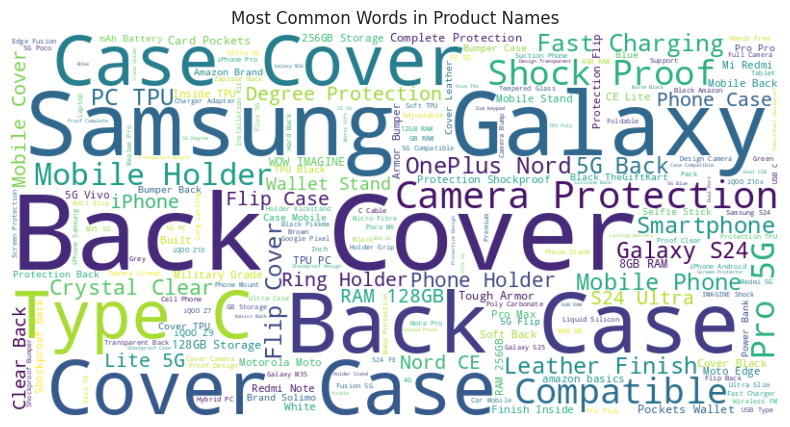

In [23]:
from wordcloud import WordCloud

text = " ".join(df['Product_Name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Product Names")
plt.show()


/tmp/ipython-input-93374828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Brand'].value_counts().head(10).index,


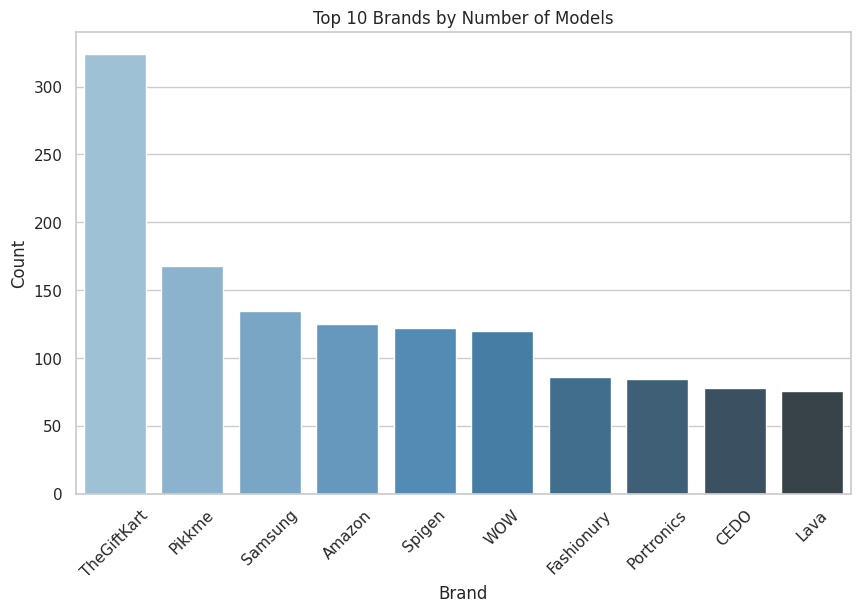

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Brand'].value_counts().head(10).index,
            y=df['Brand'].value_counts().head(10).values, palette='Blues_d')
plt.title("Top 10 Brands by Number of Models")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


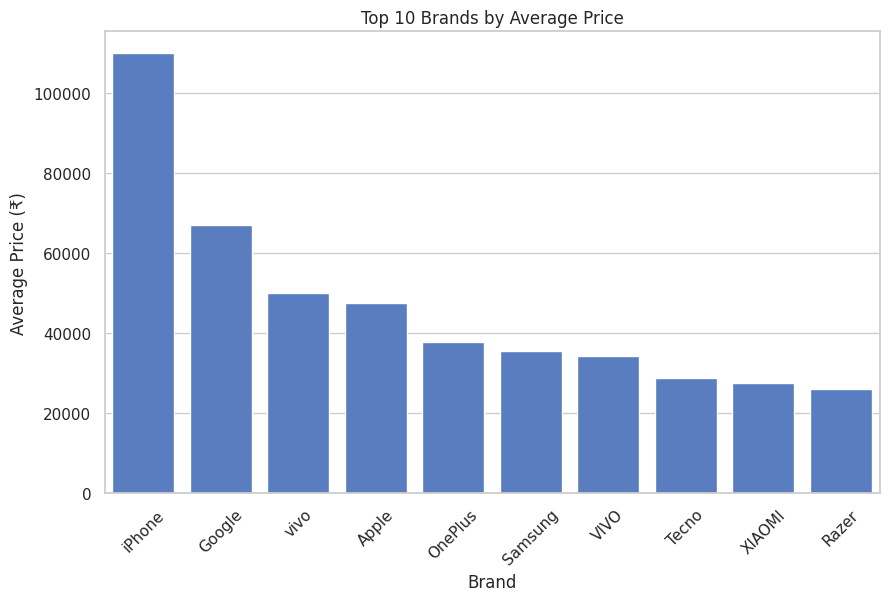

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Brand', y='Price', data=df.groupby('Brand', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False).head(10))
plt.title("Top 10 Brands by Average Price")
plt.xticks(rotation=45)
plt.ylabel("Average Price (₹)")
plt.show()


/tmp/ipython-input-587424180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Rating', data=df.groupby('Brand', as_index=False)['Rating'].mean().sort_values(by='Rating', ascending=False).head(10), palette='Greens')


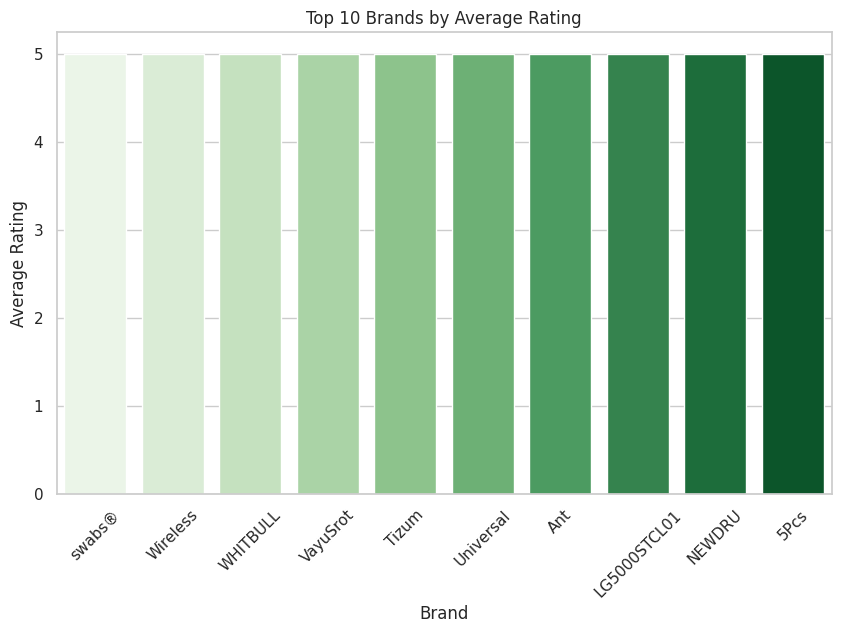

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='Brand', y='Rating', data=df.groupby('Brand', as_index=False)['Rating'].mean().sort_values(by='Rating', ascending=False).head(10), palette='Greens')
plt.title("Top 10 Brands by Average Rating")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()


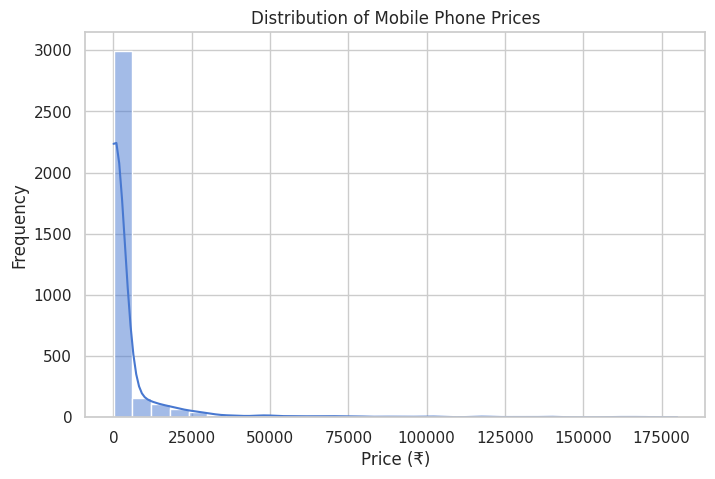

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Mobile Phone Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()


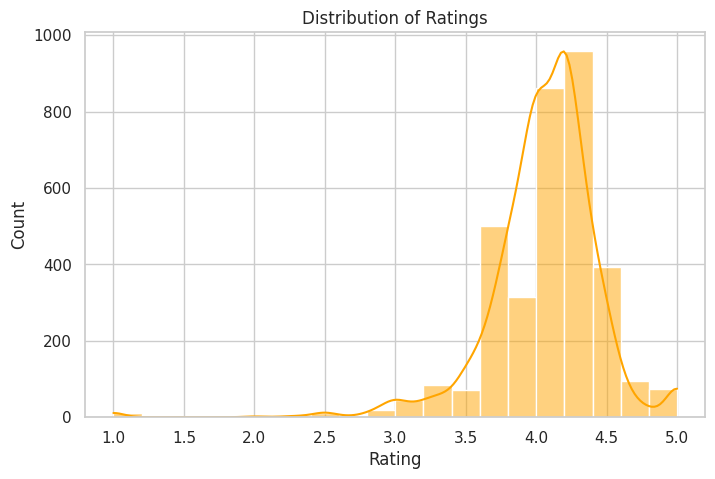

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


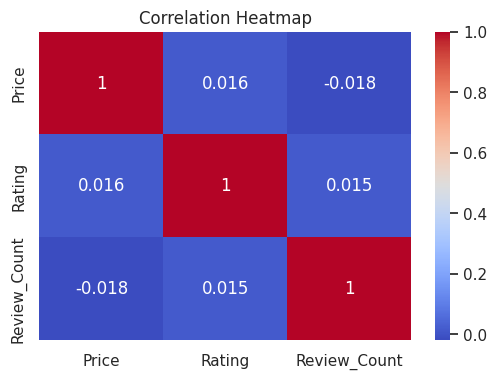

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Price', 'Rating', 'Review_Count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


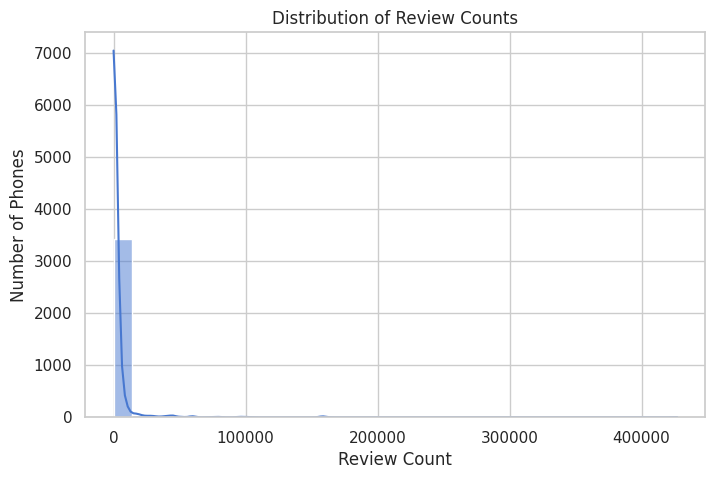

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Review_Count'], bins=30, kde=True)
plt.title("Distribution of Review Counts")
plt.xlabel("Review Count")
plt.ylabel("Number of Phones")
plt.show()


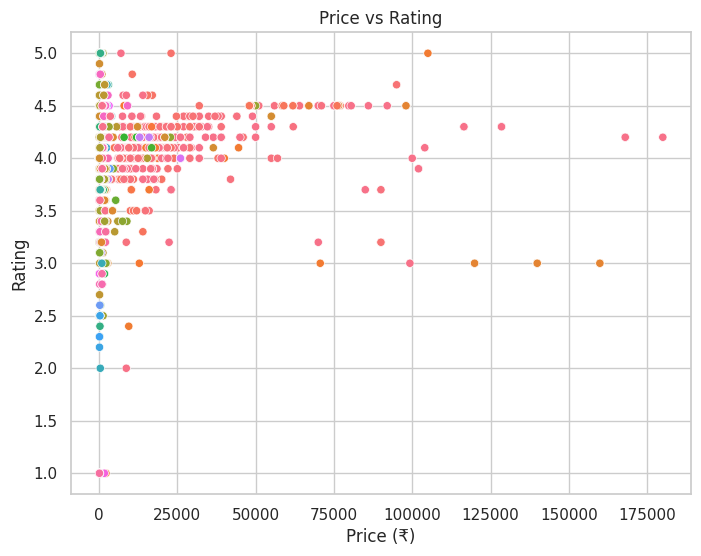

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Rating', data=df, hue='Brand', legend=False)
plt.title("Price vs Rating")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()


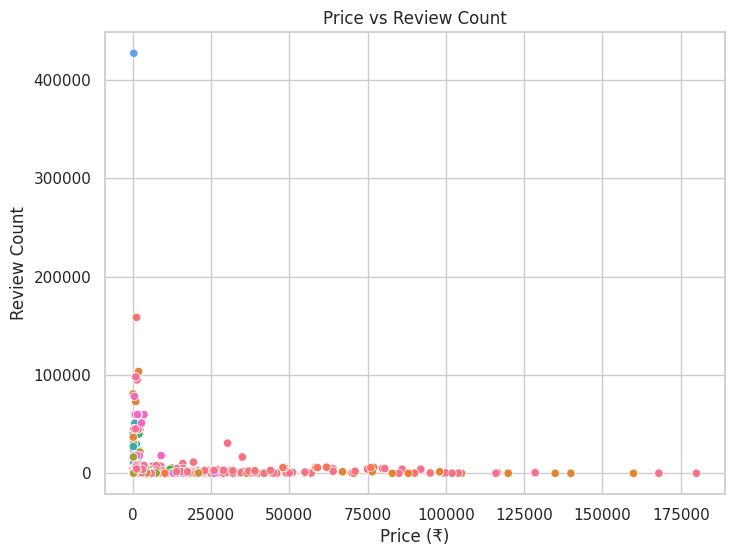

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Review_Count', data=df, hue='Brand', legend=False)
plt.title("Price vs Review Count")
plt.xlabel("Price (₹)")
plt.ylabel("Review Count")
plt.show()


/tmp/ipython-input-307091316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top5_brands)], palette='pastel')


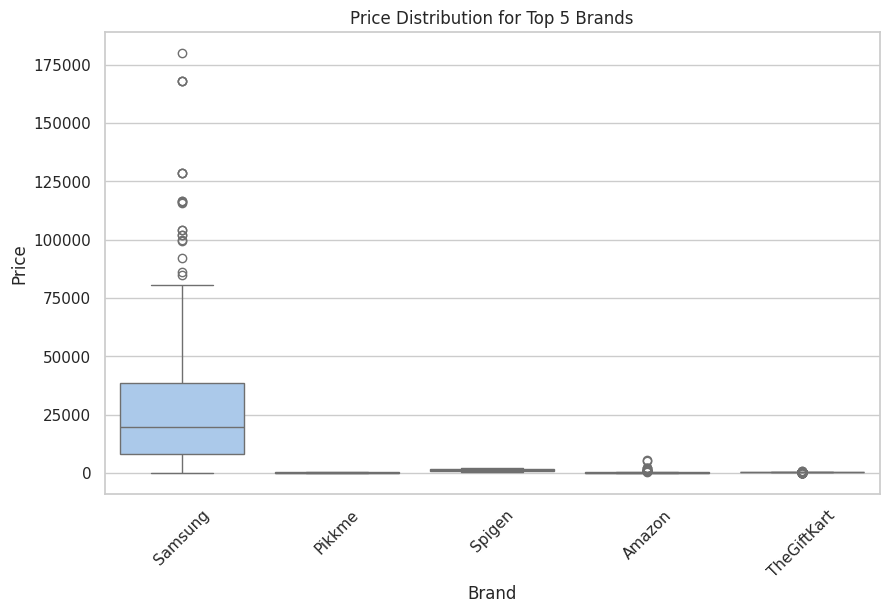

In [35]:
top5_brands = df['Brand'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top5_brands)], palette='pastel')
plt.title("Price Distribution for Top 5 Brands")
plt.xticks(rotation=45)
plt.show()


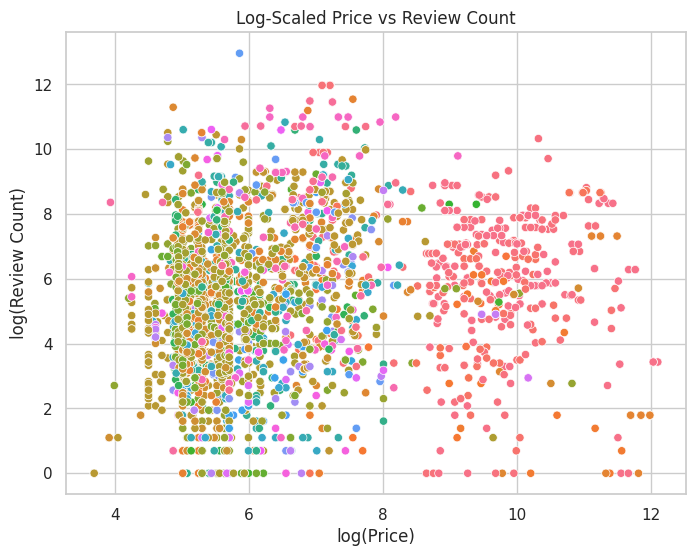

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=np.log1p(df['Price']), y=np.log1p(df['Review_Count']), hue=df['Brand'], legend=False)
plt.title("Log-Scaled Price vs Review Count")
plt.xlabel("log(Price)")
plt.ylabel("log(Review Count)")
plt.show()


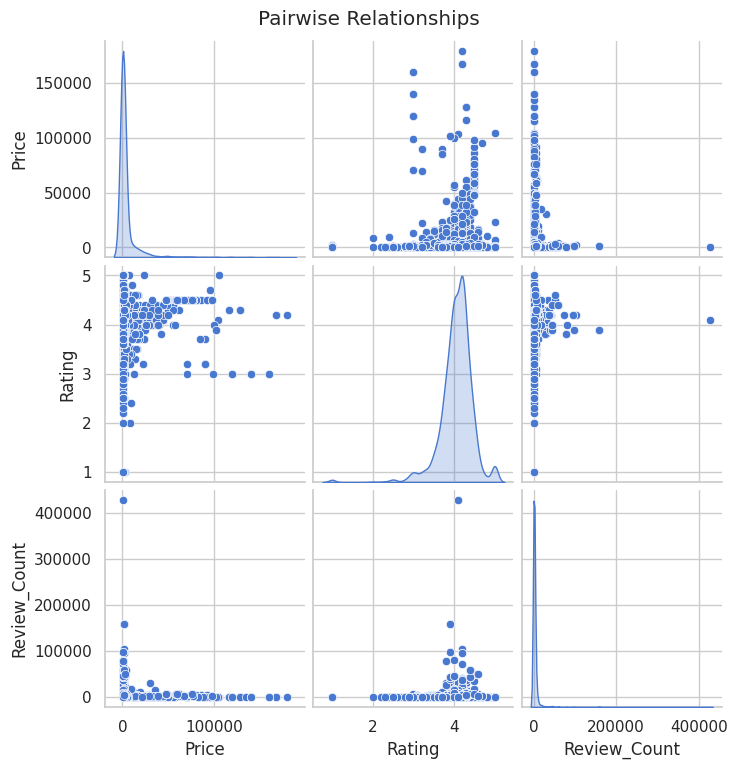

In [38]:
sns.pairplot(df[['Price','Rating','Review_Count']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


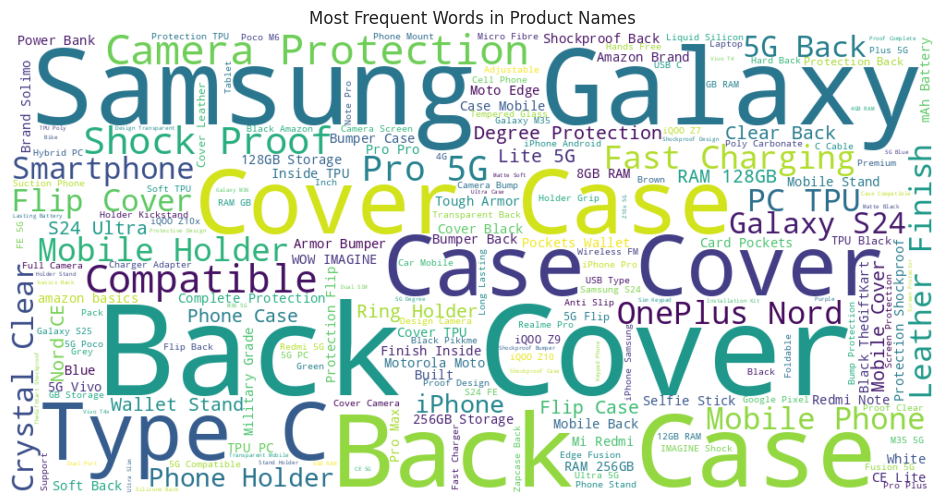

In [39]:
from wordcloud import WordCloud

text = " ".join(df['Product_Name'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Product Names")
plt.show()


/tmp/ipython-input-4100598940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value_Score', y='Product_Name', data=top_value, palette='viridis')


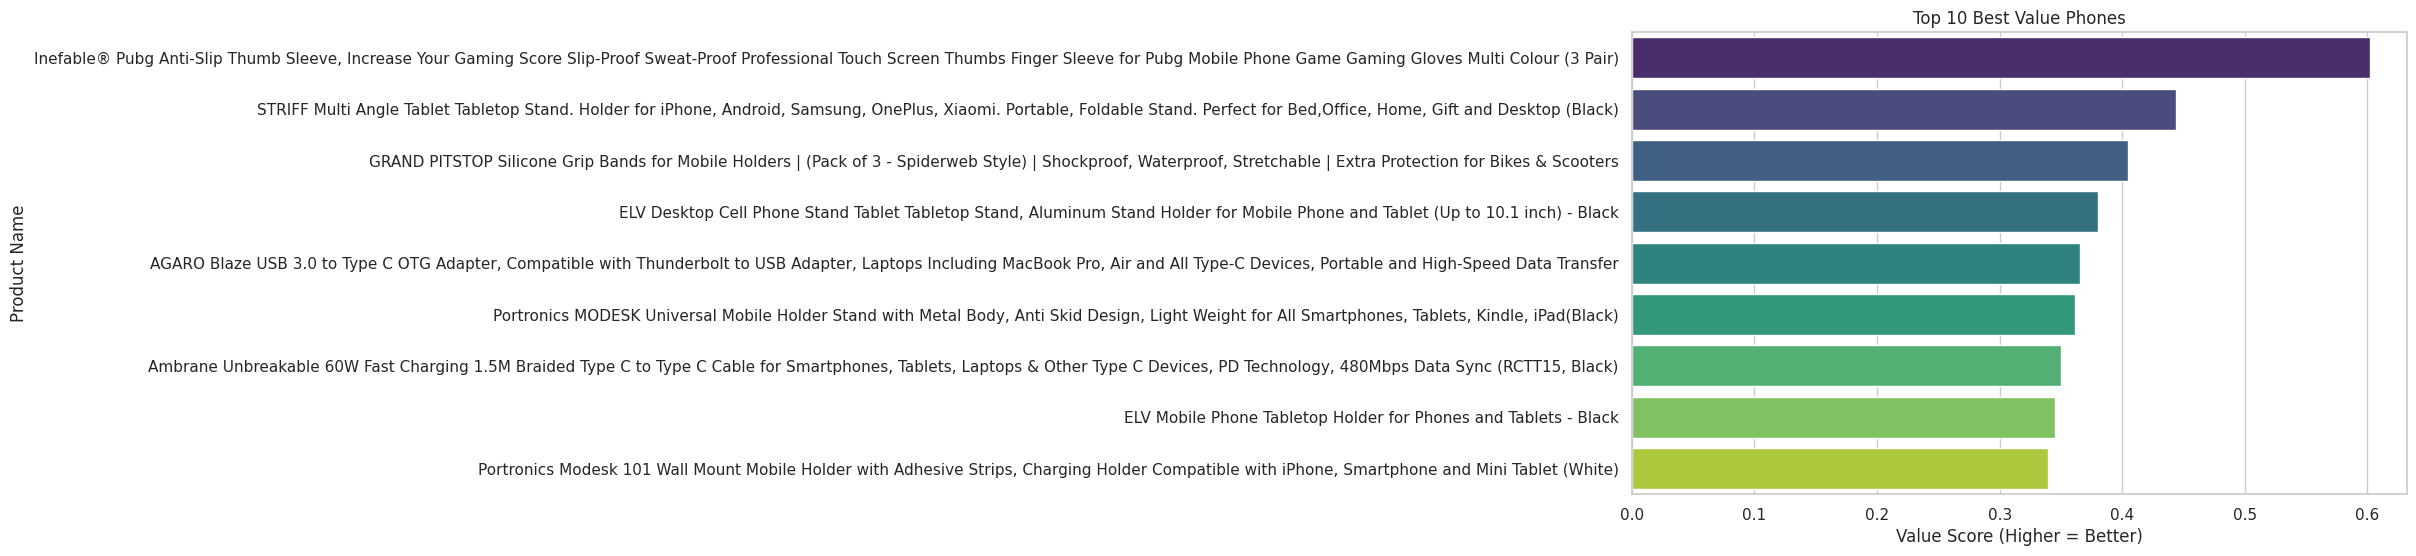

In [40]:
df['Value_Score'] = (df['Rating'] * np.log1p(df['Review_Count'])) / df['Price']
top_value = df.sort_values(by='Value_Score', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Value_Score', y='Product_Name', data=top_value, palette='viridis')
plt.title("Top 10 Best Value Phones")
plt.xlabel("Value Score (Higher = Better)")
plt.ylabel("Product Name")
plt.show()


/tmp/ipython-input-4154159782.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Review_Count', data=df, estimator=np.mean, ci=None, palette='cool')
/tmp/ipython-input-4154159782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Review_Count', data=df, estimator=np.mean, ci=None, palette='cool')


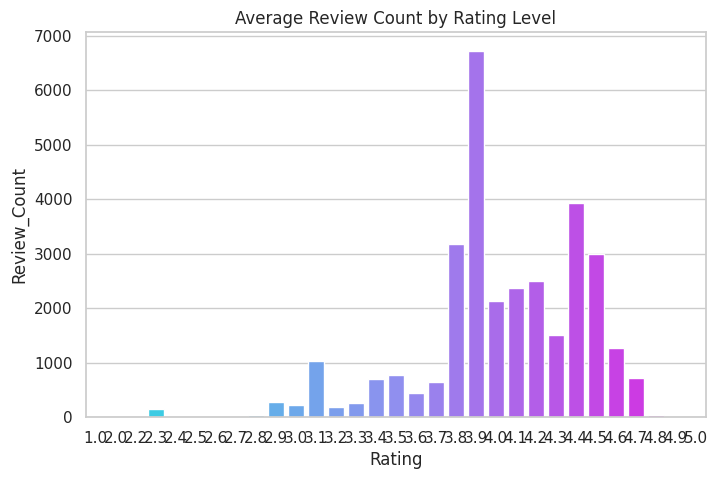

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='Rating', y='Review_Count', data=df, estimator=np.mean, ci=None, palette='cool')
plt.title("Average Review Count by Rating Level")
plt.show()
